Apply **DBSCAN Clustering** for the **Country Status DataSet**. It contains the following data fields: country, child_mort, exports, health,	imports, income,	inflation,	life_expec,	total_fer,	gdpp

# Define the Required Libraries for this problem. **(2 marks)**

In [1]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score 
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist, pdist

# import functions from scipy to perform clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cophenet

Open the CSV file and display the statistical information about the dataset **(1 mark)**

In [2]:
# load the csv file and store the data in 'df'
df = pd.read_csv('Country-data.csv')
# display first five observations using head()
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Print the correlation map and find the most related features. **(1 mark)**

Text(0.5, 1.0, 'Correlation Map Of Country Data')

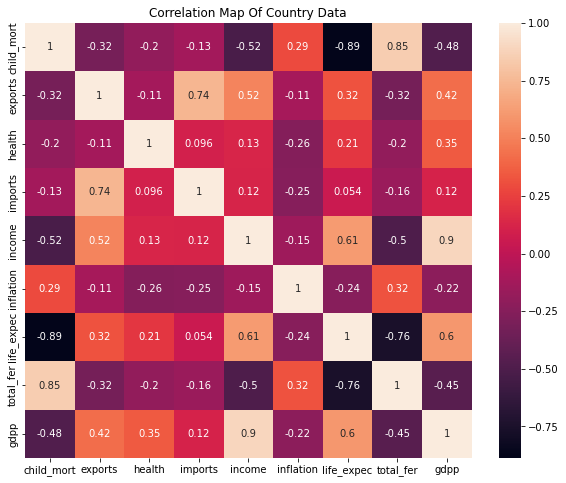

In [3]:
# Visualize the correlations between the variables
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(),annot = True)
plt.title('Correlation Map Of Country Data')

# Plot a graph with the correlated features. **(1 mark)**

In [4]:
# Correlated features
count_data = df[['child_mort', 'imports', 'gdpp']]

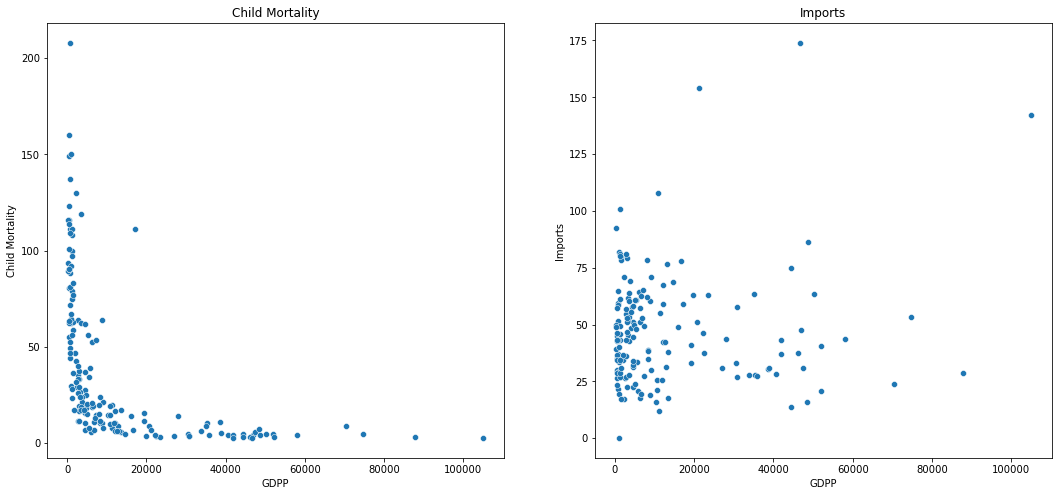

In [5]:
# Create scatterplots comparing "child_mort" with "gdpp"
plt.figure(figsize=(18,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = count_data)
plt.title('Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')
# Create scatterplots comparing "imports" with "gdpp"
plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = count_data)
plt.title('Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

# Apply Elbow Method to find optimal clusters. **(1 marks)**

In [6]:
count_data = df[['child_mort', 'imports', 'gdpp']]
# create several cluster combinations ranging from 1 to 20 and observe the wcss (Within Cluster Sum of Squares) for each cluster
# consider an empty list to store the WCSS
wcss  = []

# use for loop to perform K-means with different values of K
# set the 'random_state' to obtain the same centroid initialization for each code run
# fit the model on scaled data
# append the value of WCSS for each K to the list 'wcss'
# the 'inertia_' retuns the WCSS for specific value of K
for i in range(1,21):
    kmeans = KMeans(n_clusters = i, random_state = 10)
    kmeans.fit(count_data)
    wcss.append(kmeans.inertia_)

# Plot Elbow curve **(1 mark)**

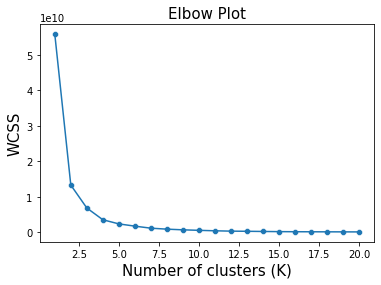

In [7]:
# visualize the elbow plot to get the optimal value of K
sns.lineplot(range(1,21), wcss)
sns.scatterplot(range(1,21), wcss)
# set the axes and plot labels
# set the font size using 'fontsize'
plt.title('Elbow Plot', fontsize = 15)
plt.xlabel('Number of clusters (K)', fontsize = 15)
plt.ylabel('WCSS', fontsize = 15)

# display the plot
plt.show()

# Apply DBSCAN to find optimal eps and minpts. **(2 marks)**

In [8]:
kmeans = KMeans(n_clusters = 2)
kmeans.fit(count_data)
country_clust = count_data.copy()

In [9]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(country_clust)

for eps in [i/10 for i in range(2,5)]:
    for min_samples in range (7,9):
        print(f'\neps {eps}')
        print(f'\min samples {min_samples}')
        
        dbscan = DBSCAN(eps = eps, min_samples = min_samples)
        labels = dbscan.fit_predict(scaled_data)
        score = silhouette_score(scaled_data, labels)
        
        print(f'clusters present: {np.unique(labels)}')
        print(f'clusters sizes: {np.bincount(labels + 1)}')
        print(f'Silhouette Score: {score}')


eps 0.2
\min samples 7
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.21529913756850436

eps 0.2
\min samples 8
clusters present: [-1  0]
clusters sizes: [156  11]
Silhouette Score: -0.21529913756850436

eps 0.3
\min samples 7
clusters present: [-1  0  1  2]
clusters sizes: [119  30  11   7]
Silhouette Score: -0.1361511565100906

eps 0.3
\min samples 8
clusters present: [-1  0  1]
clusters sizes: [130  29   8]
Silhouette Score: -0.1458651260536372

eps 0.4
\min samples 7
clusters present: [-1  0  1]
clusters sizes: [ 53 101  13]
Silhouette Score: 0.16269123987216677

eps 0.4
\min samples 8
clusters present: [-1  0  1  2]
clusters sizes: [70 78 11  8]
Silhouette Score: 0.08356780586915075


The best hyperparam are eps: 0.4 and min samples: 7, because it has the highest silhouette score, but samples is inlcuded with noise.

In [10]:
# Apply DBSCAN with optimal eps
dbscan = DBSCAN(eps=0.4, min_samples=7)
dbscan_labels = dbscan.fit_predict(scaled_data)
dbscan_labels

array([ 0,  0,  0,  0,  0,  0,  0, -1, -1,  0, -1, -1,  0,  0,  0, -1,  0,
        0, -1,  0,  0, -1,  0,  1,  0,  0,  0, -1,  0,  1,  0, -1, -1,  0,
        0,  0,  0,  0, -1,  0,  0,  0, -1, -1, -1,  0,  0,  0,  0, -1,  0,
        0,  0,  1,  1, -1,  0,  0,  1,  0,  1,  0,  0,  0,  0, -1, -1,  0,
        1,  0,  0,  0,  0, -1,  1,  1,  0, -1,  0,  0,  0, -1,  1, -1,  0,
        0,  0, -1, -1,  0,  0, -1,  0,  0, -1,  0,  0, -1, -1, -1,  0, -1,
       -1,  0,  0,  0,  0, -1, -1,  0, -1,  1,  0, -1, -1,  0, -1, -1,  0,
        0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0, -1, -1, -1, -1, -1,
       -1,  0,  0,  1,  0,  0, -1,  0, -1, -1, -1,  0,  0,  0, -1,  0,  0,
        0,  0,  0,  0, -1,  1, -1,  0,  0,  0,  0, -1,  0,  0],
      dtype=int64)

# Plot the DBSCAN clustered datapoints using scatter plot. **(1 mark)**

In [11]:
# Apply DBSCAN with optimal eps
dbscan = DBSCAN(eps = 0.4, min_samples = 7)
labels = dbscan.fit_predict(scaled_data)
country_clust['clustdbscan'] = labels

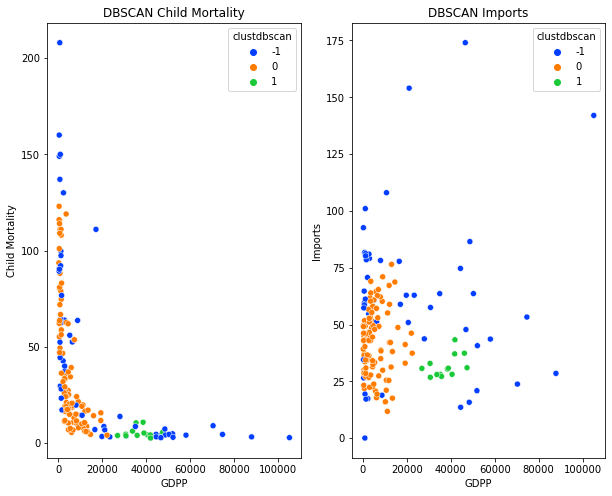

In [12]:
plt.figure(figsize = (10,8))
plt.subplot(1, 2, 1)
sns.scatterplot(x = 'gdpp', y = 'child_mort', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.title('DBSCAN Child Mortality')
plt.xlabel('GDPP')
plt.ylabel('Child Mortality')

plt.subplot(1, 2, 2)
sns.scatterplot(x = 'gdpp', y = 'imports', data = country_clust, hue = 'clustdbscan', palette = 'bright')
plt.title('DBSCAN Imports')
plt.xlabel('GDPP')
plt.ylabel('Imports')
plt.show()

 there is a lot of noise more than I think. With DBSCAN, I can see the accurate model.

Apply **Fuzzy C Means Clustering** for the Country Status DataSet. It contains the following data fields: country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp

# Define the Required Libraries for this problem. **(2 marks)**

In [13]:
# import 'numpy' to compute high-level mathematics functions 
import numpy as np

# import 'pandas' to perform data manipulation
import pandas as pd

# import 'matplotlib.pyplot' for visualization
import matplotlib.pyplot as plt
%matplotlib inline

# import 'seaborn' for high-level statistical graphics
import seaborn as sns

# to ignore the warnings run the following code
import warnings
warnings.filterwarnings("ignore")

# run below code to convert the 'exponential' values to float
np.set_printoptions(suppress = True)

# import functions from sklearn to perform clustering
from fcmeans import FCM
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder

# Open the CSV file and display the statistical information about the dataset **(1 mark)**

In [14]:
# load the csv file and store the data in 'data'
data = pd.read_csv('Country-data.csv')
# display first five observations using head()
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [15]:
columns = data.columns
columns

Index(['country', 'child_mort', 'exports', 'health', 'imports', 'income',
       'inflation', 'life_expec', 'total_fer', 'gdpp'],
      dtype='object')

# Label encode the country field from the dataset. **(1 mark)**

In [16]:
# Encode labels in column 'country'.
le = LabelEncoder()
data['country'] = le.fit_transform(data['country'])

In [17]:
print(data.shape)
data.head()

(167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


# Print the correlation map and find the most related features. **(1 mark)**

<AxesSubplot:>

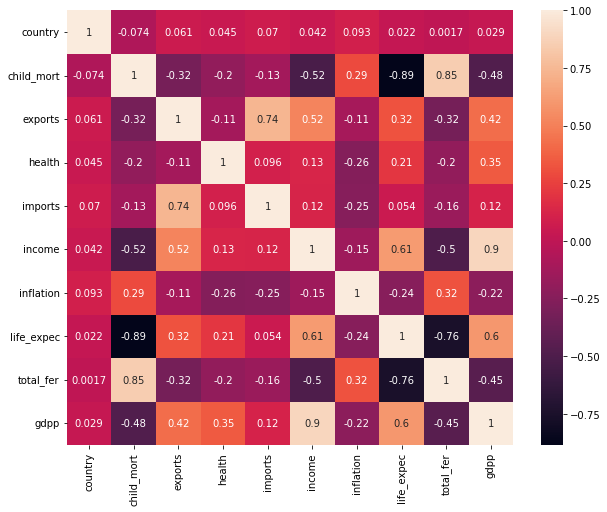

In [18]:
# Visualize the correlations between the variables
plt.figure(figsize=(10,8))
sns.heatmap(data.corr( ),annot=True)

# Scaling the dataset. **(1 mark)**

In [19]:
# initialize the StandardScaler
scalarModel = StandardScaler()

# normalize all the columns of the dataframe 'X_filtered'
X_data = scalarModel.fit_transform(data)

# create a dataframe of scaled numerical variables
# pass the required column names to the parameter 'columns'
data = pd.DataFrame(data , columns = columns )
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...,...
162,162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


In [20]:
data = data.values
data

array([[   0.  ,   90.2 ,   10.  , ...,   56.2 ,    5.82,  553.  ],
       [   1.  ,   16.6 ,   28.  , ...,   76.3 ,    1.65, 4090.  ],
       [   2.  ,   27.3 ,   38.4 , ...,   76.5 ,    2.89, 4460.  ],
       ...,
       [ 164.  ,   23.3 ,   72.  , ...,   73.1 ,    1.95, 1310.  ],
       [ 165.  ,   56.3 ,   30.  , ...,   67.5 ,    4.67, 1310.  ],
       [ 166.  ,   83.1 ,   37.  , ...,   52.  ,    5.4 , 1460.  ]])

# Apply Fuzzy C-Means Algorithm. **(2 marks)**

In [21]:
fcmModel = FCM(n_clusters = 2)
fcmModel.fit(data)
center = fcmModel.centers
center

array([[   82.79890892,     6.27482491,    55.82343396,     8.85536275,
           47.6423568 , 46599.2584557 ,     3.40561496,    79.9567406 ,
            1.86486353, 44180.53825653],
       [   82.5968192 ,    47.4767344 ,    36.06718918,     6.35622581,
           46.11655663,  8840.70221744,     8.92487169,    67.93062107,
            3.26700854,  4751.4294589 ]])

# Merge the predicted label with the dataframe. **(2 marks)**

In [22]:
#Calculating Prediction
pred = fcmModel.predict(data)
print('Predicted Value for fcmModel is : ' , pred)
pred.shape

Predicted Value for fcmModel is :  [1 1 1 1 1 1 1 0 0 1 1 0 1 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 1 1 1 1 1 1 1 0 1 1 1 1 0
 0 0 1 0 1 1 1 1 0 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0
 0 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 1 1 1 1 0 0 1 1 1 1 0 0 1 1
 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1]


(167,)

In [23]:
data = pd.DataFrame(data , columns = columns )
data

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,0.0,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
1,1.0,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
2,2.0,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
3,3.0,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
4,4.0,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0
...,...,...,...,...,...,...,...,...,...,...
162,162.0,29.2,46.6,5.25,52.7,2950.0,2.62,63.0,3.50,2970.0
163,163.0,17.1,28.5,4.91,17.6,16500.0,45.90,75.4,2.47,13500.0
164,164.0,23.3,72.0,6.84,80.2,4490.0,12.10,73.1,1.95,1310.0
165,165.0,56.3,30.0,5.18,34.4,4480.0,23.60,67.5,4.67,1310.0


In [24]:
# add the cluster column to the dataframe 
data['cluster'] = pred
data['cluster'].head()

0    1
1    1
2    1
3    1
4    1
Name: cluster, dtype: int64

# Plot the Fuzzy C Means clustered datapoints using scatter plot. **(1 mark)**

In [25]:
data = data.values
data

array([[   0.  ,   90.2 ,   10.  , ...,    5.82,  553.  ,    1.  ],
       [   1.  ,   16.6 ,   28.  , ...,    1.65, 4090.  ,    1.  ],
       [   2.  ,   27.3 ,   38.4 , ...,    2.89, 4460.  ,    1.  ],
       ...,
       [ 164.  ,   23.3 ,   72.  , ...,    1.95, 1310.  ,    1.  ],
       [ 165.  ,   56.3 ,   30.  , ...,    4.67, 1310.  ,    1.  ],
       [ 166.  ,   83.1 ,   37.  , ...,    5.4 , 1460.  ,    1.  ]])

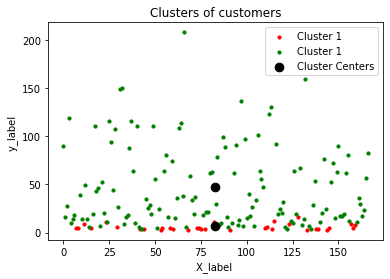

In [26]:
# Visualising the clusters
plt.scatter(data[pred == 0, 0], data[pred == 0, 1], s = 10, c='r', label='Cluster 1')
plt.scatter(data[pred == 1, 0], data[pred == 1, 1], s = 10, c='g', label='Cluster 1' )
#plt.scatter(data[pred == 2, 0], data[pred == 2, 1], s = 10, c = 'g' )
plt.scatter(center[:, 0], center[:, 1], s = 300, c = 'black',marker = '.', label = 'Cluster Centers')
plt.title('Clusters of customers')
plt.xlabel('X_label ')
plt.ylabel('y_label ')
plt.legend()
plt.show()